<a href="https://colab.research.google.com/github/Gautami-2607/Data-Analytics-/blob/main/Lung_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
!pip install -q kaggle

from google.colab import files
files.upload()

!cd /content/
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

!ls -alh ~/.kaggle

from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

Saving kaggle.json to kaggle.json
total 16K
drwxr-xr-x 2 root root 4.0K Jun  1 06:20 .
drwx------ 1 root root 4.0K Jun  1 06:20 ..
-rw-r--r-- 1 root root   71 Jun  1 06:20 kaggle.json


In [3]:
!cd /content/
!kaggle competitions download -c 2023bmi707-assignment-2-q5

  0% 0.00/51.4k [00:00<?, ?B/s]
100% 51.4k/51.4k [00:00<00:00, 77.0MB/s]


In [4]:
! unzip 2023bmi707-assignment-2-q5

Archive:  2023bmi707-assignment-2-q5.zip
  inflating: sampleSubmission.csv    


In [5]:
!wget https://www.dropbox.com/s/feaakvusdvkep3n/train.tar

--2023-06-01 06:20:17--  https://www.dropbox.com/s/feaakvusdvkep3n/train.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/feaakvusdvkep3n/train.tar [following]
--2023-06-01 06:20:17--  https://www.dropbox.com/s/raw/feaakvusdvkep3n/train.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucec4d8b645b4911df7aa94ed536.dl.dropboxusercontent.com/cd/0/inline/B9IXHpTmTw_wOFsNYTXn66Sdg8gtI1mLHSjSql1EEVAbTdFJoHiLRdPRzBt9Rt_DJWyN_-RRZ1Tuf15xFx629wdhlKsGhZk9g2A_cu1AGZJrEL1vexqT83RidkGAv0dgsFLidBSnOqXLHDTD79LHUmLe9apwrfsziutzqz3Y5iPcKc_ri5avZCOvrBJLeTyTTso/file# [following]
--2023-06-01 06:20:18--  https://ucec4d8b645b4911df7aa94ed536.dl.dropboxusercontent.com/cd/0/inline/B9IXHpTmTw_wOFsNYTXn66Sdg8gtI1mLHSjSql1EEVAbTdFJoHiLRdPRzBt9Rt_DJWyN

In [6]:
!wget https://www.dropbox.com/s/9kebfecemhfkj7k/train.csv

--2023-06-01 06:22:26--  https://www.dropbox.com/s/9kebfecemhfkj7k/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9kebfecemhfkj7k/train.csv [following]
--2023-06-01 06:22:26--  https://www.dropbox.com/s/raw/9kebfecemhfkj7k/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc145077d9529f49b5fc079f0acd.dl.dropboxusercontent.com/cd/0/inline/B9JMBPS6UAP6ID15_TpSARp4XXYKtZ_5z4Bvd_UshMgHBd2ELqMVsGcuFISwFtfk5C2uOWBlJ1IBrZBnN5Vn-oTniPMDt93wUrnnKmxXXuUiM2cfR2OIL0OV1z6K6cnc9bP9uxZfg1x9Ma9eOpXq0NfUmzZQD9DjMU0UJa4BDoGVGoZb8mQBIB3-fX3I4vl4N1Y/file# [following]
--2023-06-01 06:22:26--  https://uc145077d9529f49b5fc079f0acd.dl.dropboxusercontent.com/cd/0/inline/B9JMBPS6UAP6ID15_TpSARp4XXYKtZ_5z4Bvd_UshMgHBd2ELqMVsGcuFISwFtfk5C2u

In [7]:
!wget https://www.dropbox.com/s/20d8b9z8znc2lmp/testPublic.tar

--2023-06-01 06:23:46--  https://www.dropbox.com/s/20d8b9z8znc2lmp/testPublic.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/20d8b9z8znc2lmp/testPublic.tar [following]
--2023-06-01 06:23:47--  https://www.dropbox.com/s/raw/20d8b9z8znc2lmp/testPublic.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7b3c8ba1e30b27557c2c4048bd.dl.dropboxusercontent.com/cd/0/inline/B9J7AWl_OdTq5LOuQs9YjATh1eTYXySzC6zkS6WINQWizwip6LxANBYqo6Dwqqql0mcWxtOA8LEZi8gH3jrz3aqemYhnbbbSP8Ny1-8vSL2brSsdYIQyQWp2QcQCKohymLhrz2Xw9GZIxZCuLnpMyL8WkVDllvVApjc_lUiS9v4WQ3NxaWr1aJKcB5xy4XtHFIs/file# [following]
--2023-06-01 06:23:47--  https://uc7b3c8ba1e30b27557c2c4048bd.dl.dropboxusercontent.com/cd/0/inline/B9J7AWl_OdTq5LOuQs9YjATh1eTYXySzC6zkS6WINQWizwip6LxAN

In [8]:
!wget https://www.dropbox.com/s/lun96wxiq84z7eg/testPrivate.tar

--2023-06-01 06:24:12--  https://www.dropbox.com/s/lun96wxiq84z7eg/testPrivate.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lun96wxiq84z7eg/testPrivate.tar [following]
--2023-06-01 06:24:12--  https://www.dropbox.com/s/raw/lun96wxiq84z7eg/testPrivate.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfb066f251f7b2af523e1feeb02.dl.dropboxusercontent.com/cd/0/inline/B9L6EOElIxzZKykOolWBq-j3j2p1L-YRRVI0iiRKBObZV9smXQzi-7JVHe29_zU-vTruxpvLQYHHejUmd9xtS_VsPPzVuP31xVYZOeCSOsLIeprIGkHygj_FIQMVHPpEGAi4y-MkWWbw9-SHzfcDe5F0XuymQbN-76uUIGPEntjhUzyvUAFQgYEqFmkoRMJKb6E/file# [following]
--2023-06-01 06:24:13--  https://ucfb066f251f7b2af523e1feeb02.dl.dropboxusercontent.com/cd/0/inline/B9L6EOElIxzZKykOolWBq-j3j2p1L-YRRVI0iiRKBObZV9smXQ

In [9]:
train=pd.read_csv("train.csv")
# test=pd.read_csv("test.csv")
submission=pd.read_csv("sampleSubmission.csv")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10629 entries, 0 to 10628
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   00000011_000.png  10629 non-null  object
 1   1                 10629 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 166.2+ KB


In [11]:
train.head()

,00000011_000.png,1
0,00000011_006.png,0
1,00000011_007.png,2
2,00000025_000.png,1
3,00000030_001.png,0
4,00000032_013.png,2


In [12]:
train['1'].value_counts()

2    5748
0    2541
1    2340
Name: 1, dtype: int64

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

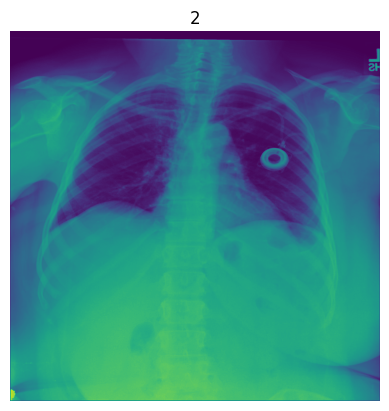

In [15]:
import tarfile
import csv
import matplotlib.pyplot as plt
from PIL import Image

# Path to the TAR file containing the training images
tar_path = 'train.tar'

# Path to the CSV file containing image labels
csv_path = 'train.csv'

# Open the TAR file
with tarfile.open(tar_path, 'r') as tar:
    # Extract all image file names from the TAR file
    image_files = [file for file in tar.getnames() if file.endswith('.jpg') or file.endswith('.png')]

    # Read the CSV file to obtain image labels
    with open(csv_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)  # Skip the header row if present
        labels = []
        for row in csv_reader:
            labels.append(row[1])  # Assuming the label is in the second column (index 1)

    # Plot the first image in the TAR file with its label
    image_path = tar.extractfile(image_files[1])
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    #plt.x_label()
    plt.title(labels[1])
    plt.show()


In [16]:
X=train['00000011_000.png']
y=train['1']

In [17]:
# Extracting train images into a folder:

import tarfile

my_tar = tarfile.open('/content/train.tar')
my_tar.extractall('train_images') # specify which folder to extract to
my_tar.close()

In [18]:
# Extracting private images of test data into a folder:

import tarfile

my_tar = tarfile.open('//content/testPrivate.tar')
my_tar.extractall('test_private') # specify which folder to extract to
my_tar.close()

In [19]:
# Extracting public images of test data into a folder:

import tarfile

my_tar = tarfile.open('/content/testPublic.tar')
my_tar.extractall('test_public') # specify which folder to extract to
my_tar.close()

In [20]:
train=pd.read_csv("train.csv")
# test=pd.read_csv("test.csv")
submission=pd.read_csv("/content/sampleSubmission.csv")

In [21]:
import csv

csv_file = open('train.csv', 'r')
csv_reader = csv.reader(csv_file)

# Create a dictionary to store the image-label mappings
image_labels = {}

# Iterate over the CSV data and populate the dictionary
for row in csv_reader:
    image_file = row[0]
    label = row[1]
    image_labels[image_file] = label

csv_file.close()

In [28]:
from PIL import Image

# Iterate over the extracted image files
for image_file in image_labels.keys():
    # Open and process each image
    image_path ='/content/train_images/train'  # Update with the correct path to the extracted images
    image = Image.open(image_path)
    
    # Get the corresponding label
    label = image_labels[image_file]
    
    # Perform operations on the image and label as needed
    
    # Example: Display the image and label
    image.show()
    print("Label:", label)

IsADirectoryError: ignored